<a href="https://colab.research.google.com/github/Osstrinha/Fisica-Computacional-2/blob/main/Lista_3_Fis_Comp_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import sys
print(sys.version)

print("link para arquivo: https://colab.research.google.com/drive/1TUaOxFKjuCm64-ra8R4Js9_EOfRYXDB_?usp=sharing")

3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
link para arquivo: https://colab.research.google.com/drive/1TUaOxFKjuCm64-ra8R4Js9_EOfRYXDB_?usp=sharing


1)

a)



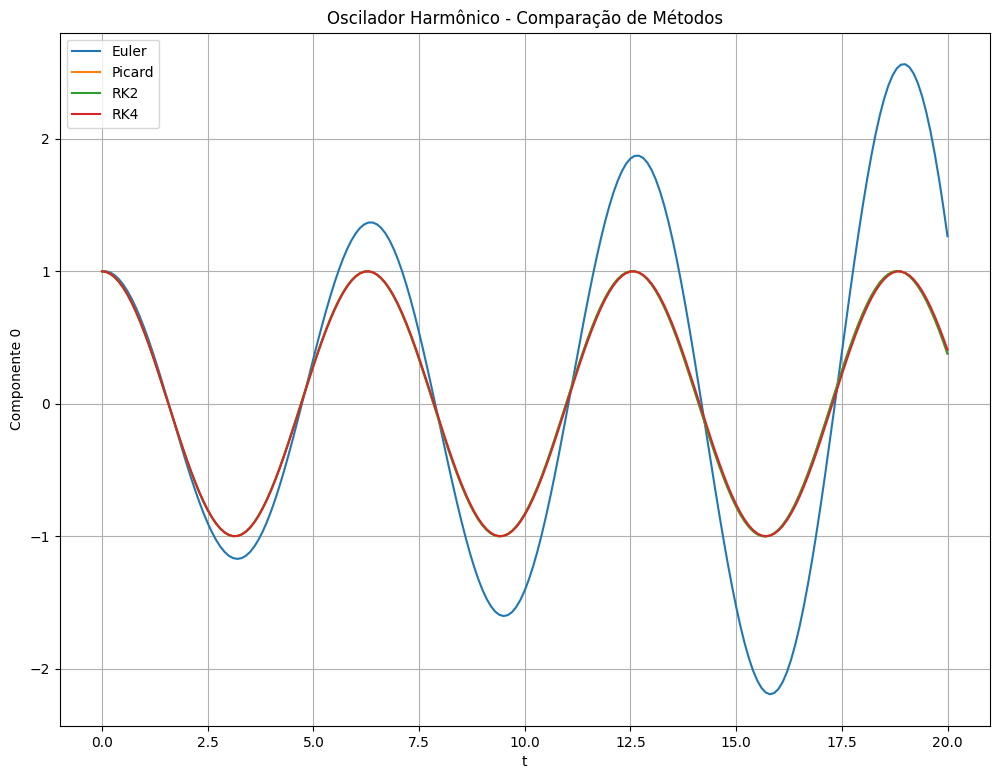


b)



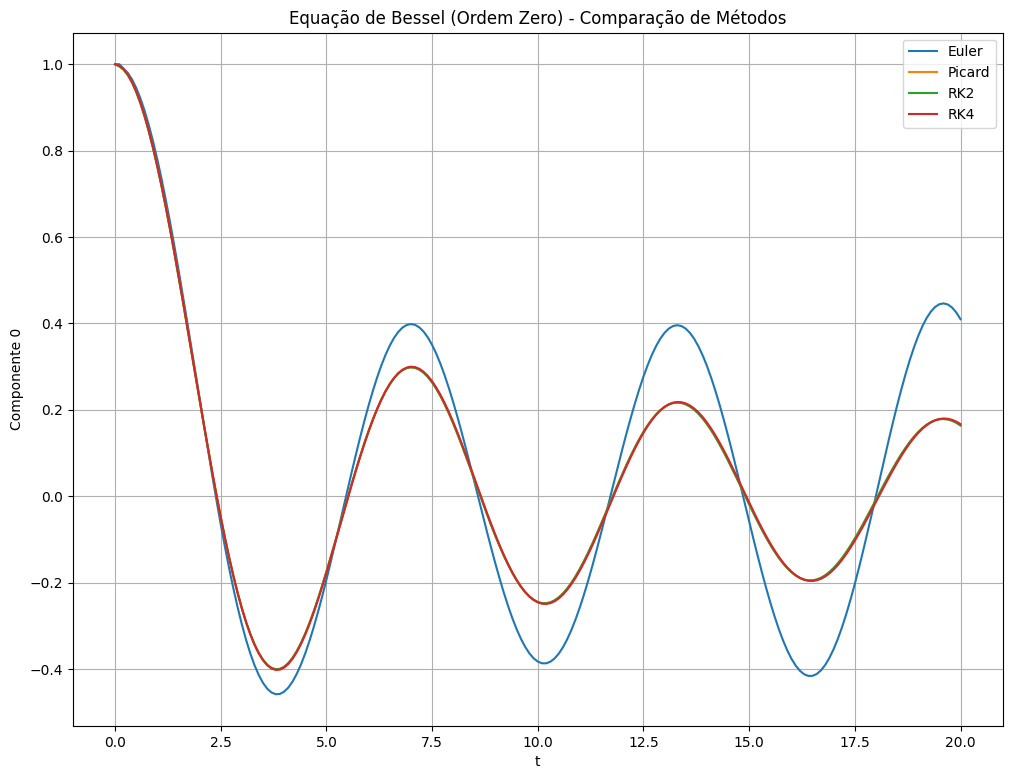

In [90]:
import numpy as np
import matplotlib.pyplot as plt

# Método de Euler
def euler(y, t, dt, g):
    return y + dt * g(y, t)

# Método de Picard
def picard(y, t, dt, g):
    y_pred = y + dt * g(y, t)  # Predição inicial
    return y + 0.5 * dt * (g(y, t) + g(y_pred, t + dt))

# Método de Runge-Kutta de 2ª ordem (RK2)
def rk2(y, t, dt, g):
    k1 = g(y, t)
    k2 = g(y + dt * k1, t + dt)
    return y + (dt / 2) * (k1 + k2)

# Método de Runge-Kutta de 4ª ordem (RK4)
def rk4(y, t, dt, g):
    k1 = g(y, t)
    k2 = g(y + 0.5 * dt * k1, t + 0.5 * dt)
    k3 = g(y + 0.5 * dt * k2, t + 0.5 * dt)
    k4 = g(y + dt * k3, t + dt)
    return y + (dt / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

# Oscilador Harmônico
def g_harmonico(y, t):
    return np.array([y[1], -y[0]])

# Equação de Bessel de ordem zero
def g_bessel(y, t):
    return np.array([y[1], -y[1] / t - y[0]])

# Função para resolver EDOs
def resolver_edo(g, y0, t0, tmax, dt, metodo):
    t = np.arange(t0, tmax + dt, dt)
    y = np.zeros((len(t), len(y0)))
    y[0] = y0

    for i in range(1, len(t)):
        y[i] = metodo(y[i - 1], t[i - 1], dt, g)

    return t, y

# Parâmetros gerais
dt = 20 / 200  # Passo de tempo (grid com 200 pontos)
t0, tmax = 0.00001, 20.00001  # Intervalo de tempo ## Início diferente de 0 para a equação de Bessel

# Oscilador Harmônico
y0_harmonico = np.array([1.0, 0.0])  # Condição inicial

# Equação de Bessel
y0_bessel = np.array([1.0, 0.0])  # Condição inicial

# Resolver EDOs com diferentes métodos
metodos = {"Euler": euler, "Picard": picard, "RK2": rk2, "RK4": rk4}

# Resultados para o Oscilador Harmônico
resultados_harmonico = {}
for nome, metodo in metodos.items():
    t, y = resolver_edo(g_harmonico, y0_harmonico, t0, tmax, dt, metodo)
    resultados_harmonico[nome] = (t, y)

# Resultados para a Equação de Bessel
resultados_bessel = {}
for nome, metodo in metodos.items():
    t, y = resolver_edo(g_bessel, y0_bessel, t0, tmax, dt, metodo)
    resultados_bessel[nome] = (t, y)

# Gráficos
def plot_resultados(resultados, titulo, componente=0):
    plt.figure(figsize=(12, 9))
    for nome, (t, y) in resultados.items():
        plt.plot(t, y[:, componente], label=nome)
    plt.title(titulo)
    plt.xlabel("t")
    plt.ylabel(f"Componente {componente}")
    plt.legend()
    plt.grid(True)
    plt.show()

# Plotar resultados
print("1)")
print()
print("a)")
print()
plot_resultados(resultados_harmonico, "Oscilador Harmônico - Comparação de Métodos", componente=0)

print()
print("b)")
print()
plot_resultados(resultados_bessel, "Equação de Bessel (Ordem Zero) - Comparação de Métodos", componente=0)




1)

a)



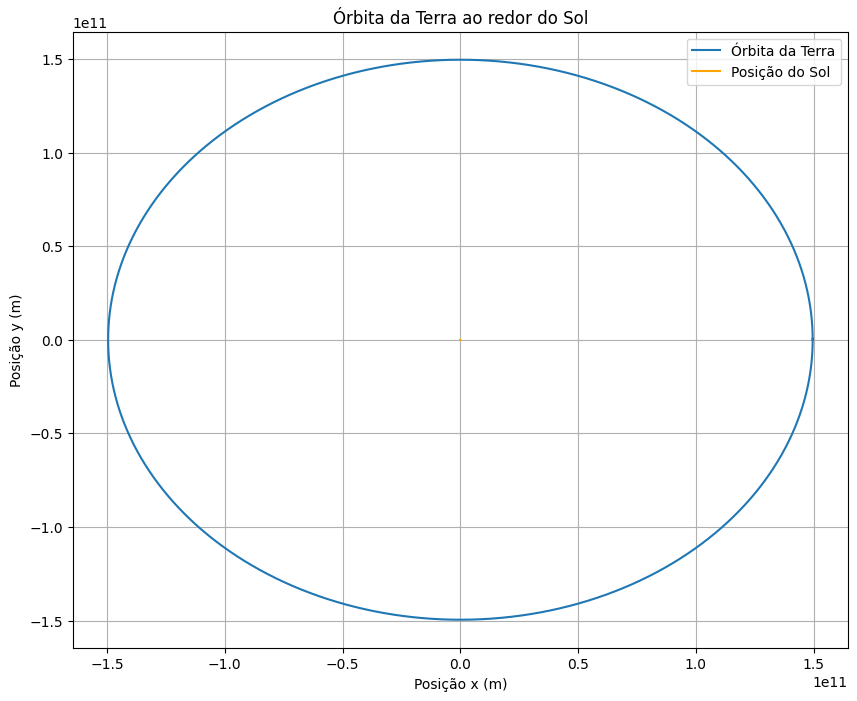

b)


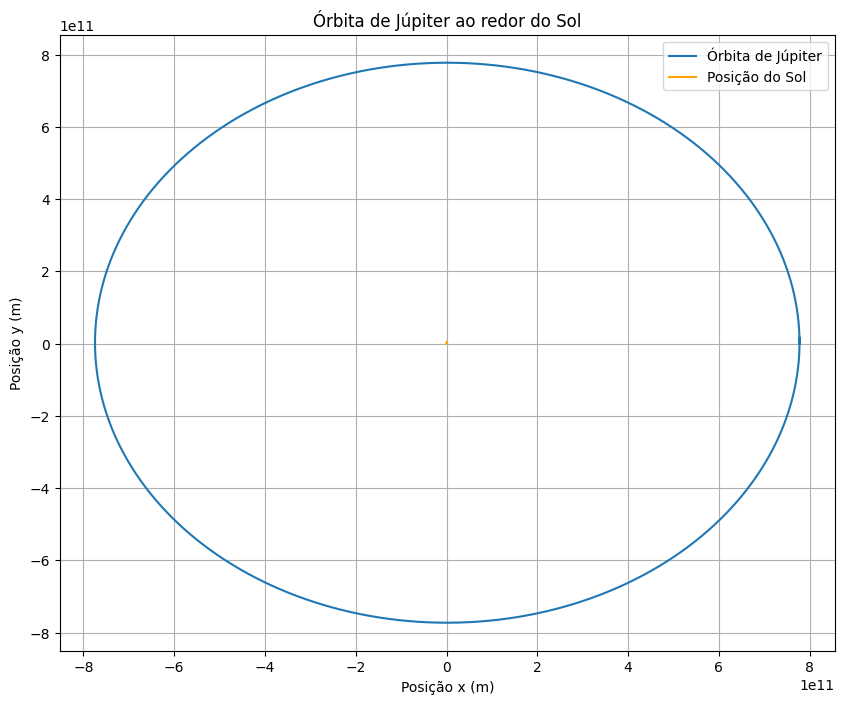


c)


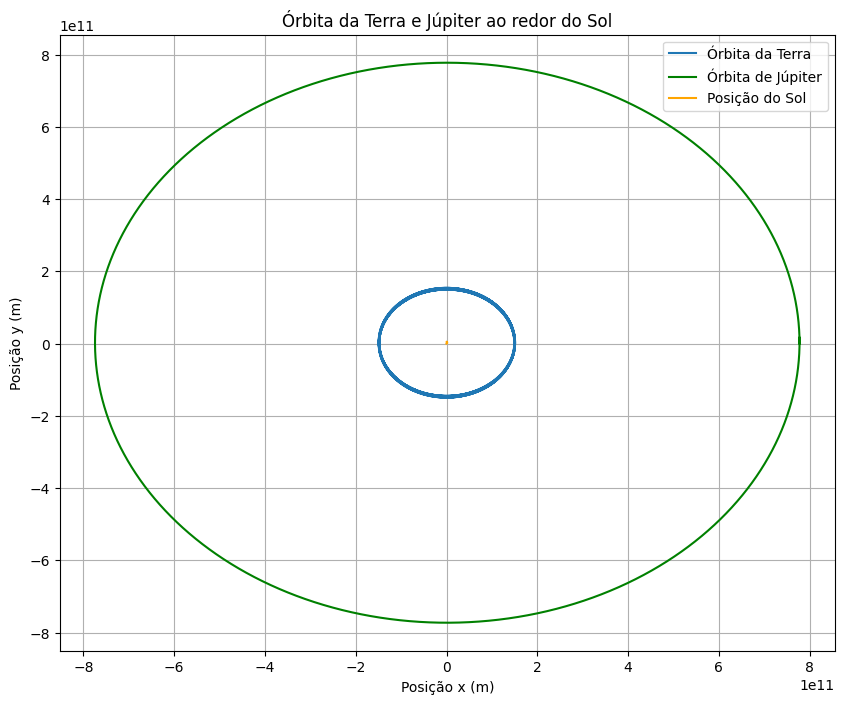

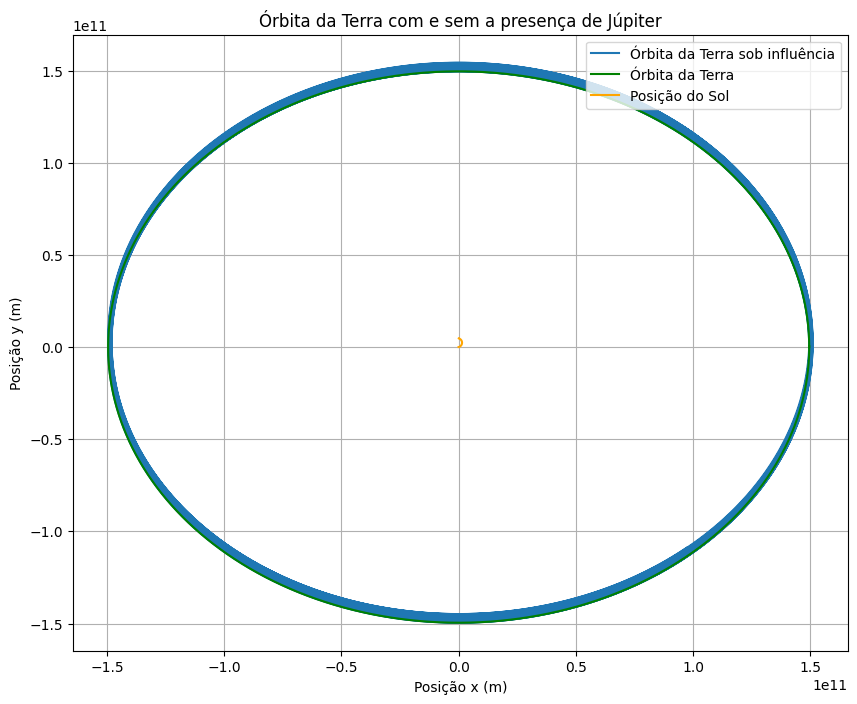

A mudança que Júpiter causou no sistema pode ser observada por meio do gráfico de diferença de distância dos dois casos


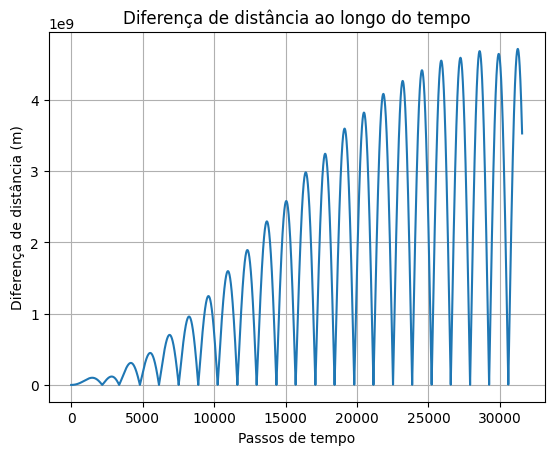

Sua maior diferença de órbita foi = 4715142981.590759 m

d)


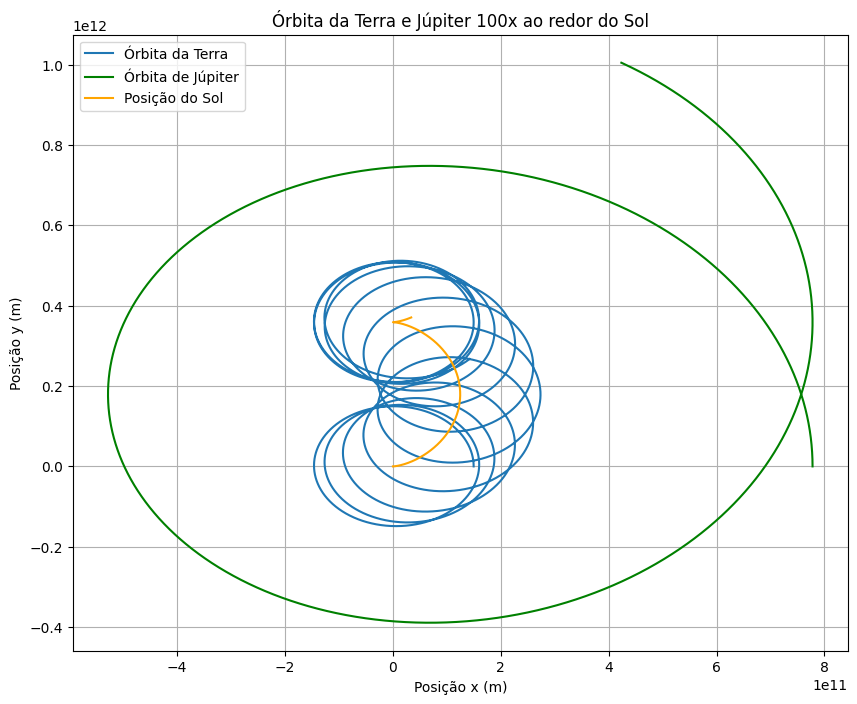

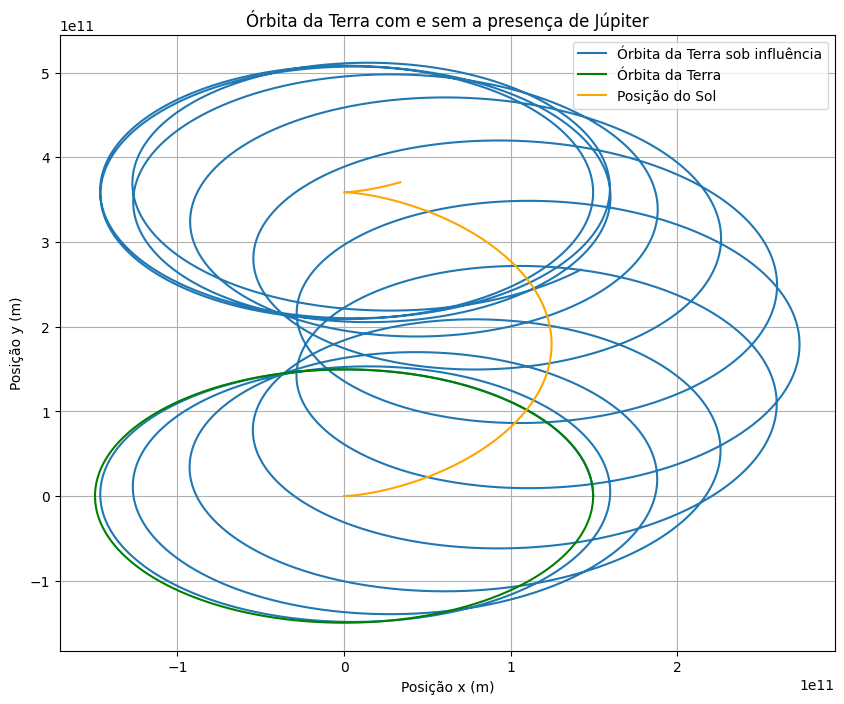

A mudança que Júpiter causou no sistema pode ser observada por meio do gráfico de diferença de distância dos dois casos


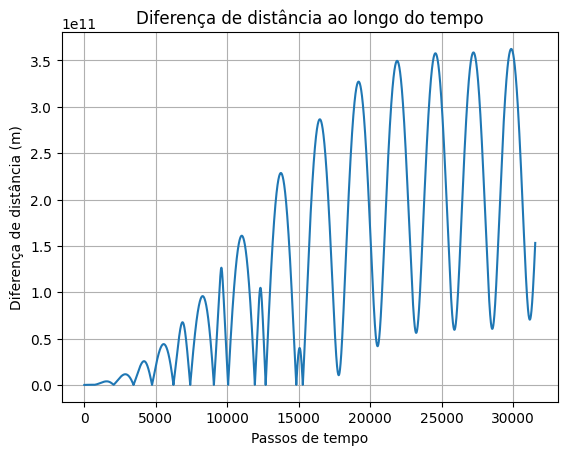

Sua maior diferença de órbita foi = 362427516409.17346 m


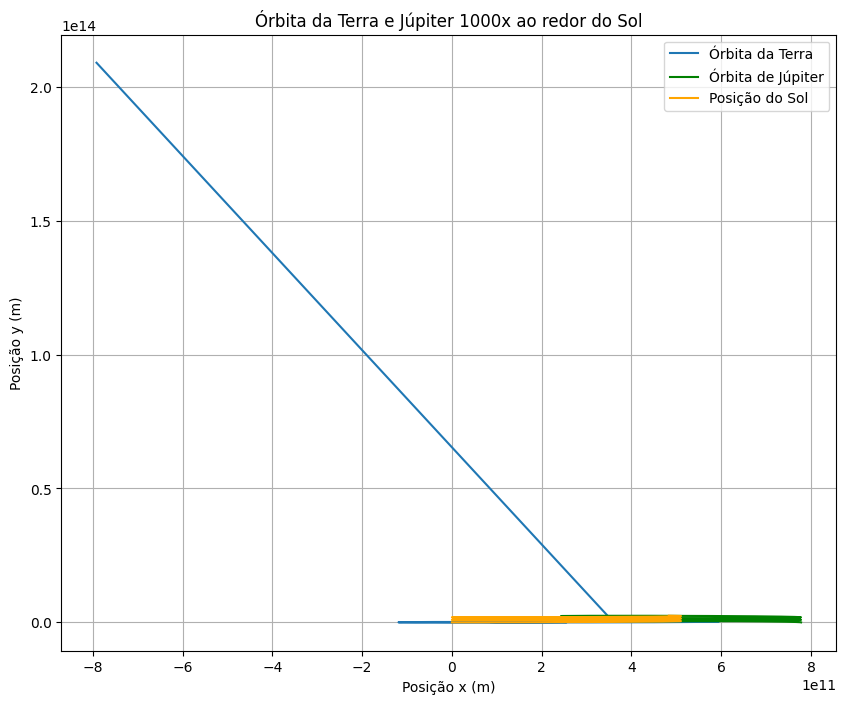

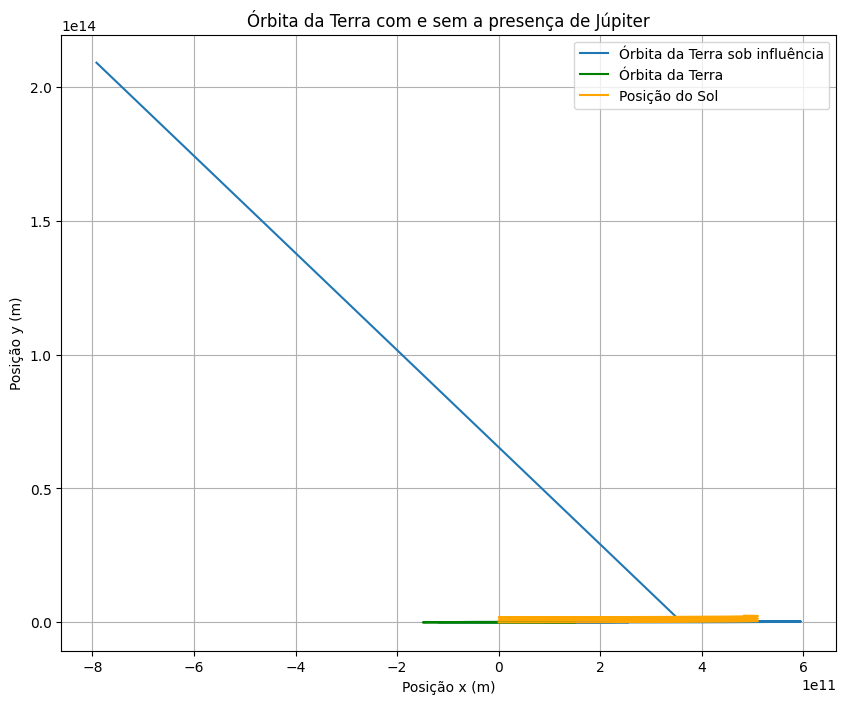

A mudança que Júpiter causou no sistema pode ser observada por meio do gráfico de diferença de distância dos dois casos


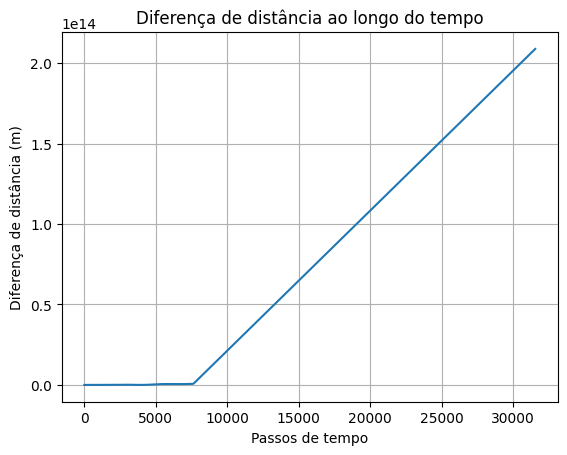

Sua maior diferença de órbita foi = 208815774356610.16 m

No meu caso, o programa que montei computava as eventuais forças exercidas no Sol - ou seja, era um programa mais realista. Por isso, na consideração de Júpiter tendo massas muito maiores,
a influência foi tanta que a Terra passou a ser orbitar Júpiter, e portanto, foi arremessado fora do sistema solar. Isso resultaria, dentre vários fenômenos, no resfriamento quase completo do planeta Terra, impossibilitando a vida como conhecemos.


In [91]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes universais
G = 6.67430e-11  # Constante gravitacional, m³/(kg·s²)
M_sun = 1.989e30  # Massa do Sol, kg
R_earth = 1.496e11  # Distância média Terra-Sol, m
M_earth = 5.972e24  # Massa da Terra, kg
R_jupiter = 5.2 * R_earth  # Distância média de Jupiter, m
M_jupiter = 1.898e27  # Massa de Jupiter, kg


# Equações diferenciais para o sistema
def sistema_corpos(y, t, massas):
    G=6.67430e-11 # Constante gravitacional, m³/(kg·s²)
    n_corpos = len(massas)
    dydt = np.zeros_like(y)  # Inicializa as derivadas

    for i in range(n_corpos):
        # Extrair posição e velocidade do corpo i
        xi, yi = y[4 * i], y[4 * i + 1]  # Coordenadas x e y do corpo i
        vxi, vyi = y[4 * i + 2], y[4 * i + 3]  # Velocidades vx e vy do corpo i

        # Inicializar força resultante no corpo i
        fx, fy = 0.0, 0.0

        for j in range(n_corpos):
            if i != j:  # Evitar calcular a força do corpo sobre si mesmo
                # Extrair posição do corpo j
                xj, yj = y[4 * j], y[4 * j + 1]

                # Vetor posição relativo
                dx, dy = xj - xi, yj - yi
                distancia = np.sqrt(dx**2 + dy**2)

                # Calcular a força gravitacional entre i e j
                if distancia > 1e-6:  # Evitar divisão por zero
                    f = G * massas[i] * massas[j] / distancia**2
                    fx += f * dx / distancia  # Componente x
                    fy += f * dy / distancia  # Componente y

        # Atualizar derivadas para o corpo i
        dydt[4 * i] = vxi  # dx/dt = vx
        dydt[4 * i + 1] = vyi  # dy/dt = vy
        dydt[4 * i + 2] = fx / massas[i]  # dvx/dt = ax
        dydt[4 * i + 3] = fy / massas[i]  # dvy/dt = ay

    return dydt

# Método RK4
def rk4(y, t, dt, f, *args):
    k1 = f(y, t, *args)
    k2 = f(y + 0.5 * dt * k1, t + 0.5 * dt, *args)
    k3 = f(y + 0.5 * dt * k2, t + 0.5 * dt, *args)
    k4 = f(y + dt * k3, t + dt, *args)
    return y + dt * (k1 + 2 * k2 + 2 * k3 + k4) / 6

# Função de simulação
def simular_orbita(y0, massas, tmax, dt):
    t = np.arange(0.0001, tmax, dt)
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    for i in range(1, len(t)):
        y[i] = rk4(y[i - 1], t[i - 1], dt, sistema_corpos, massas)
    return t, y



print("1)")
print()
print("a)")
print()

# Simulação
massas = [M_sun, M_earth]  # Massas do Sol e da Terra
tmax = 365.25 * 24 * 3600  # 1 ano em segundos
dt = 1000  # Passo de tempo de 1000 segundos

# Parâmetros iniciais
y0_sol = np.array([0.0, 0.0, 0.0, 0.0])  # Posição e velocidade do Sol
y0_terra = np.array([R_earth, 0.0, 0.0, 2 * np.pi * R_earth / (365.25 * 24 * 3600)])  # Posição e velocidade da Terra

y0 = np.concatenate((y0_sol, y0_terra))



t, y = simular_orbita(y0, massas, tmax, dt)

# Plotando a órbita
plt.figure(figsize=(10, 8))
plt.plot(y[:, 4], y[:, 5], label='Órbita da Terra')  # x e y da Terra (índices 4 e 5 no vetor y)
plt.plot(y[:, 0], y[:, 1], label='Posição do Sol', color='orange')  # Posição do Sol (índices 0 e 1)
plt.xlabel('Posição x (m)')
plt.ylabel('Posição y (m)')
plt.title('Órbita da Terra ao redor do Sol')
plt.legend()
plt.grid(True)
plt.show()

t_a, y_a = t, y

print("b)")


# Simulação
massas = [M_sun, M_jupiter]  # Massas do Sol e de Júpiter
tmax = np.sqrt(5.2**3) * 365.25 * 24 * 3600  # 1 ano jupiteriano em segundos
dt = np.sqrt(5.2**3) * 1000  # Passo de tempo em segundos

# Parâmetros iniciais
y0_sol = np.array([0.0, 0.0, 0.0, 0.0])  # Posição e velocidade do Sol
y0_jupiter = np.array([R_jupiter, 0.0, 0.0, 2 * np.pi * R_jupiter / (np.sqrt(5.2**3) * 365.25 * 24 * 3600)])  # Posição e velocidade de Jupiter

y0 = np.concatenate((y0_sol, y0_jupiter))




t, y = simular_orbita(y0, massas, tmax, dt)


# Plotando a órbita
plt.figure(figsize=(10, 8))
plt.plot(y[:, 4], y[:, 5], label='Órbita de Júpiter')  # x e y de Júpiter (índices 4 e 5 no vetor y)
plt.plot(y[:, 0], y[:, 1], label='Posição do Sol', color='orange')  # Posição do Sol (índices 0 e 1)
plt.xlabel('Posição x (m)')
plt.ylabel('Posição y (m)')
plt.title('Órbita de Júpiter ao redor do Sol')
plt.legend()
plt.grid(True)
plt.show()


print()
print("c)")

# Simulação
massas = [M_sun, M_earth, M_jupiter]  # Massas do Sol, Terra e Júpiter
tmax = np.sqrt(5.2**3) * 365.25 * 24 * 3600  # 1 ano jupiteriano em segundos
dt = np.sqrt(5.2**3) * 1000  # Passo de tempo de 1000 segundos

y0 = np.concatenate((y0_sol, y0_terra, y0_jupiter))



t, y = simular_orbita(y0, massas, tmax, dt)

# Plotando a órbita
plt.figure(figsize=(10, 8))
plt.plot(y[:, 4], y[:, 5], label='Órbita da Terra')  # x e y da Terra (índices 4 e 5 no vetor y)
plt.plot(y[:, 8], y[:, 9], label='Órbita de Júpiter', color='green')  # Posição de Júpiter (índices 8 e 9)
plt.plot(y[:, 0], y[:, 1], label='Posição do Sol', color='orange')  # Posição do Sol (índices 0 e 1)
plt.xlabel('Posição x (m)')
plt.ylabel('Posição y (m)')
plt.title('Órbita da Terra e Júpiter ao redor do Sol')
plt.legend()
plt.grid(True)
plt.show()


print()

# Plotando a órbita alterada pela presença de Júpiter
plt.figure(figsize=(10, 8))
plt.plot(y[:, 4], y[:, 5], label='Órbita da Terra sob influência')  # x e y da Terra (índices 4 e 5 no vetor y)
plt.plot(y_a[:, 4], y_a[:, 5], label='Órbita da Terra', color='green')  # Posição da Terra (índices 8 e 9)
plt.plot(y[:, 0], y[:, 1], label='Posição do Sol', color='orange')  # Posição do Sol (índices 0 e 1)
plt.xlabel('Posição x (m)')
plt.ylabel('Posição y (m)')
plt.title('Órbita da Terra com e sem a presença de Júpiter')
plt.legend()
plt.grid(True)
plt.show()

print("A mudança que Júpiter causou no sistema pode ser observada por meio do gráfico de diferença de distância dos dois casos")

diferenca = np.abs(np.sqrt(y[:, 4]**2 + y[:, 5]**2) - np.sqrt(y_a[:, 4]**2 + y_a[:, 5]**2))

plt.plot(diferenca)
plt.title('Diferença de distância ao longo do tempo')
plt.xlabel('Passos de tempo')
plt.ylabel('Diferença de distância (m)')
plt.grid(True)
plt.show()

diferenca_max = np.max(np.abs(np.sqrt(y[:, 4]**2 + y[:, 5]**2) - np.sqrt(y_a[:, 4]**2 + y_a[:, 5]**2)))
print(f'Sua maior diferença de órbita foi = {diferenca_max} m')



print()
print("d)")

# Simulação 100x
massas = [M_sun, M_earth, M_jupiter*100]  # Massas do Sol, Terra e Júpiter 100x
tmax = np.sqrt(5.2**3) * 365.25 * 24 * 3600  # 1 ano jupiteriano em segundos
dt = np.sqrt(5.2**3) * 1000  # Passo de tempo de 1000 segundos

y0 = np.concatenate((y0_sol, y0_terra, y0_jupiter))



t, y = simular_orbita(y0, massas, tmax, dt)

# Plotando a órbita
plt.figure(figsize=(10, 8))
plt.plot(y[:, 4], y[:, 5], label='Órbita da Terra')  # x e y da Terra (índices 4 e 5 no vetor y)
plt.plot(y[:, 8], y[:, 9], label='Órbita de Júpiter', color='green')  # Posição de Júpiter (índices 8 e 9)
plt.plot(y[:, 0], y[:, 1], label='Posição do Sol', color='orange')  # Posição do Sol (índices 0 e 1)
plt.xlabel('Posição x (m)')
plt.ylabel('Posição y (m)')
plt.title('Órbita da Terra e Júpiter 100x ao redor do Sol')
plt.legend()
plt.grid(True)
plt.show()


print()

# Plotando a órbita alterada pela presença de Júpiter
plt.figure(figsize=(10, 8))
plt.plot(y[:, 4], y[:, 5], label='Órbita da Terra sob influência')  # x e y da Terra (índices 4 e 5 no vetor y)
plt.plot(y_a[:, 4], y_a[:, 5], label='Órbita da Terra ', color='green')  # Posição da Terra (índices 8 e 9)
plt.plot(y[:, 0], y[:, 1], label='Posição do Sol', color='orange')  # Posição do Sol (índices 0 e 1)
plt.xlabel('Posição x (m)')
plt.ylabel('Posição y (m)')
plt.title('Órbita da Terra com e sem a presença de Júpiter')
plt.legend()
plt.grid(True)
plt.show()

print("A mudança que Júpiter causou no sistema pode ser observada por meio do gráfico de diferença de distância dos dois casos")

diferenca = np.abs(np.sqrt(y[:, 4]**2 + y[:, 5]**2) - np.sqrt(y_a[:, 4]**2 + y_a[:, 5]**2))

plt.plot(diferenca)
plt.title('Diferença de distância ao longo do tempo')
plt.xlabel('Passos de tempo')
plt.ylabel('Diferença de distância (m)')
plt.grid(True)
plt.show()

diferenca_max = np.max(np.abs(np.sqrt(y[:, 4]**2 + y[:, 5]**2) - np.sqrt(y_a[:, 4]**2 + y_a[:, 5]**2)))
print(f'Sua maior diferença de órbita foi = {diferenca_max} m')




# Simulação 1000x
massas = [M_sun, M_earth, M_jupiter*1000]  # Massas do Sol, Terra e Júpiter 1000x
tmax = np.sqrt(5.2**3) * 365.25 * 24 * 3600  # 1 ano jupiteriano em segundos
dt = np.sqrt(5.2**3) * 1000  # Passo de tempo de 1000 segundos

y0 = np.concatenate((y0_sol, y0_terra, y0_jupiter))



t, y = simular_orbita(y0, massas, tmax, dt)

# Plotando a órbita
plt.figure(figsize=(10, 8))
plt.plot(y[:, 4], y[:, 5], label='Órbita da Terra')  # x e y da Terra (índices 4 e 5 no vetor y)
plt.plot(y[:, 8], y[:, 9], label='Órbita de Júpiter', color='green')  # Posição de Júpiter (índices 8 e 9)
plt.plot(y[:, 0], y[:, 1], label='Posição do Sol', color='orange')  # Posição do Sol (índices 0 e 1)
plt.xlabel('Posição x (m)')
plt.ylabel('Posição y (m)')
plt.title('Órbita da Terra e Júpiter 1000x ao redor do Sol')
plt.legend()
plt.grid(True)
plt.show()


print()

# Plotando a órbita alterada pela presença de Júpiter
plt.figure(figsize=(10, 8))
plt.plot(y[:, 4], y[:, 5], label='Órbita da Terra sob influência')  # x e y da Terra (índices 4 e 5 no vetor y)
plt.plot(y_a[:, 4], y_a[:, 5], label='Órbita da Terra', color='green')  # Posição da Terra (índices 8 e 9)
plt.plot(y[:, 0], y[:, 1], label='Posição do Sol', color='orange')  # Posição do Sol (índices 0 e 1)
plt.xlabel('Posição x (m)')
plt.ylabel('Posição y (m)')
plt.title('Órbita da Terra com e sem a presença de Júpiter')
plt.legend()
plt.grid(True)
plt.show()

print("A mudança que Júpiter causou no sistema pode ser observada por meio do gráfico de diferença de distância dos dois casos")

diferenca = np.abs(np.sqrt(y[:, 4]**2 + y[:, 5]**2) - np.sqrt(y_a[:, 4]**2 + y_a[:, 5]**2))

plt.plot(diferenca)
plt.title('Diferença de distância ao longo do tempo')
plt.xlabel('Passos de tempo')
plt.ylabel('Diferença de distância (m)')
plt.grid(True)
plt.show()

diferenca_max = np.max(np.abs(np.sqrt(y[:, 4]**2 + y[:, 5]**2) - np.sqrt(y_a[:, 4]**2 + y_a[:, 5]**2)))
print(f'Sua maior diferença de órbita foi = {diferenca_max} m')

print()

print("No meu caso, o programa que montei computava as eventuais forças exercidas no Sol - ou seja, era um programa mais realista. Por isso, na consideração de Júpiter tendo massas muito maiores,\n"
 "a influência foi tanta que a Terra passou a ser orbitar Júpiter, e portanto, foi arremessado fora do sistema solar. Isso resultaria, dentre vários fenômenos, no resfriamento quase completo do planeta Terra, impossibilitando a vida como conhecemos.")



Polos atratores para r = 0.7, cond. inicial (10, 10, 10): [(-1.5802865988571636e-07, 1.1380411066284021e-08, 1.5627997138454851e-13)]
Polos atratores para r = 10, cond. inicial (10, 10, 10): [(4.8997425733355024, 4.898785168237895, 8.999695314815135)]
Polos atratores para r = 0.7, cond. inicial (15, 1, -10): [(-1.5666192666760397e-07, 1.1281857394863929e-08, 1.6036190008532554e-13)]
Polos atratores para r = 10, cond. inicial (15, 1, -10): [(-4.898122024547257, -4.89918416754736, 9.00030042434287)]


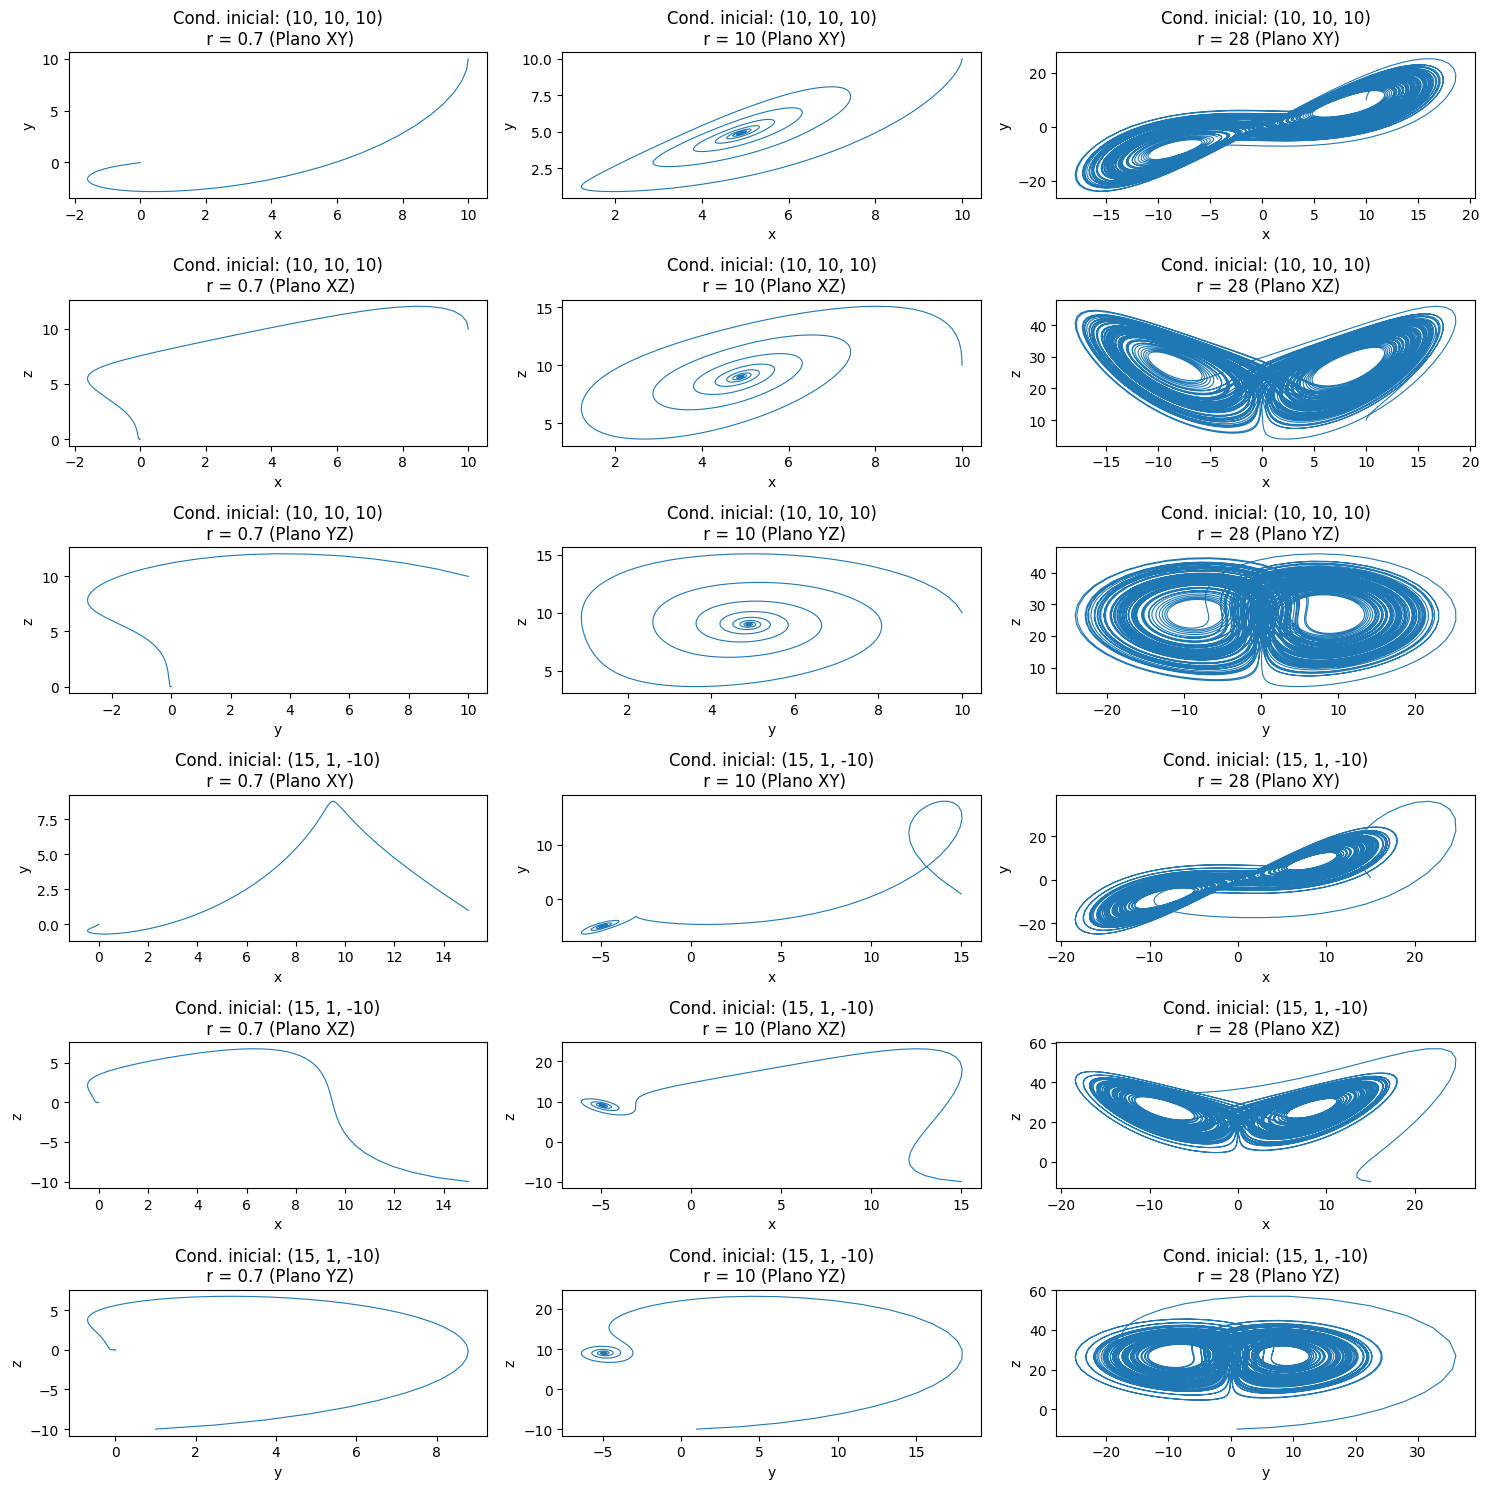


A solução para r=28 no sistema de Lorenz apresenta um comportamento caótico caracterizado por um atrator estranho que descreve uma estrutura complexa, com características de "borboleta" nos planos de projeção.


In [92]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parâmetros do sistema de Lorenz
sigma = 10
b = 8 / 3

# Função do sistema de Lorenz
def lorenz(t, state, sigma, r, b):
    x, y, z = state
    dxdt = -sigma * x + sigma * y
    dydt = -x * z + r * x - y
    dzdt = x * y - b * z
    return [dxdt, dydt, dzdt]

# Configuração de simulação
t_max = 100
n_points = 10000
t_span = (0, t_max)
t_eval = np.linspace(0, t_max, n_points)

# Condições iniciais para as simulações
initial_conditions = [
    (10, 10, 10),
    (15, 1, -10),
]

# Função para realizar simulações
def simulate_lorenz(initial_cond, r):
    solution = solve_ivp(
        lorenz, t_span, initial_cond, args=(sigma, r, b), t_eval=t_eval, method='RK45'
    )
    return solution

# Análise para diferentes valores de r
values_of_r = [0.7, 10, 28]

# Plotando trajetórias e identificando polos
fig, axs = plt.subplots(
    len(initial_conditions) * 3, len(values_of_r), figsize=(15, 15), sharex=False, sharey=False
)

for i, initial_cond in enumerate(initial_conditions):
    for j, r in enumerate(values_of_r):
        solution = simulate_lorenz(initial_cond, r)
        x, y, z = solution.y

        # Projeção no plano xy
        axs[3 * i, j].plot(x, y, lw=0.8)
        axs[3 * i, j].set_title(f"Cond. inicial: {initial_cond}\n r = {r} (Plano XY)")
        axs[3 * i, j].set_xlabel("x")
        axs[3 * i, j].set_ylabel("y")

        # Projeção no plano xz
        axs[3 * i + 1, j].plot(x, z, lw=0.8)
        axs[3 * i + 1, j].set_title(f"Cond. inicial: {initial_cond}\n r = {r} (Plano XZ)")
        axs[3 * i + 1, j].set_xlabel("x")
        axs[3 * i + 1, j].set_ylabel("z")

        # Projeção no plano yz
        axs[3 * i + 2, j].plot(y, z, lw=0.8)
        axs[3 * i + 2, j].set_title(f"Cond. inicial: {initial_cond}\n r = {r} (Plano YZ)")
        axs[3 * i + 2, j].set_xlabel("y")
        axs[3 * i + 2, j].set_ylabel("z")

        # Identificando os polos atratores (se houver)
        if r == 0.7 or r == 10:
            stable_points = [
                (np.mean(x[-100:]), np.mean(y[-100:]), np.mean(z[-100:]))
            ]
            print(f"Polos atratores para r = {r}, cond. inicial {initial_cond}: {stable_points}")

plt.tight_layout()
plt.show()

print()
print("A solução para r=28 no sistema de Lorenz apresenta um comportamento caótico caracterizado por um atrator estranho que descreve uma estrutura complexa, com características de \"borboleta\" nos planos de projeção.")


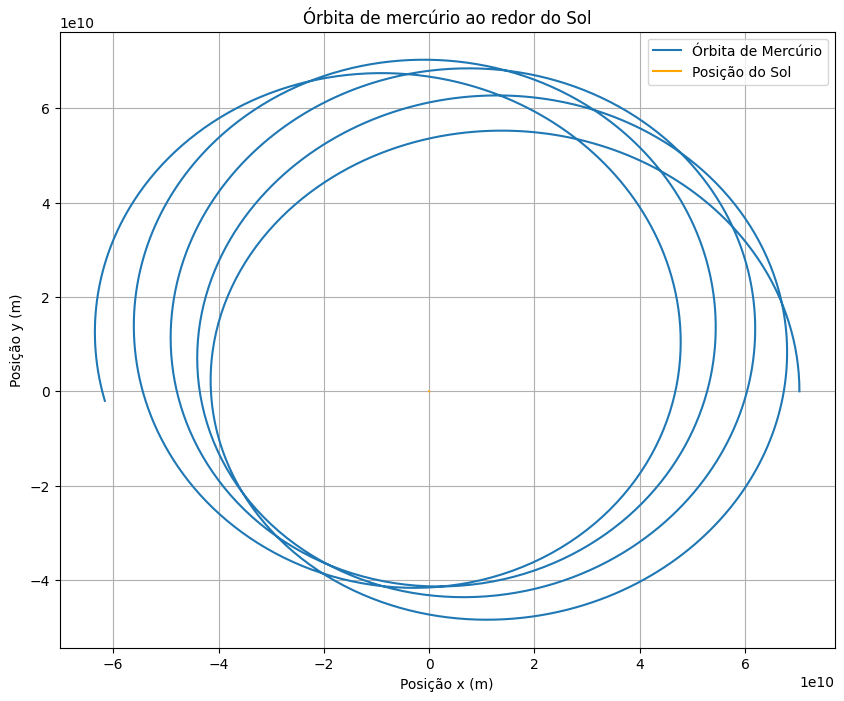

In [93]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes universais
G = 6.67430e-11  # Constante gravitacional, m³/(kg·s²)
M_sun = 1.989e30  # Massa do Sol, kg
R_earth = 1.496e11  # Distância média Terra-Sol, m
M_mercury = 3.285e23  # Massa de Mercúrio, kg
alpha = 0.01 * R_earth**2


# Equações diferenciais para o sistema
def sistema_corpos(y, t, massas):
    G=6.67430e-11 # Constante gravitacional, m³/(kg·s²)
    n_corpos = len(massas)
    dydt = np.zeros_like(y)  # Inicializa as derivadas

    for i in range(n_corpos):
        # Extrair posição e velocidade do corpo i
        xi, yi = y[4 * i], y[4 * i + 1]  # Coordenadas x e y do corpo i
        vxi, vyi = y[4 * i + 2], y[4 * i + 3]  # Velocidades vx e vy do corpo i

        # Inicializar força resultante no corpo i
        fx, fy = 0.0, 0.0

        for j in range(n_corpos):
            if i != j:  # Evitar calcular a força do corpo sobre si mesmo
                # Extrair posição do corpo j
                xj, yj = y[4 * j], y[4 * j + 1]

                # Vetor posição relativo
                dx, dy = xj - xi, yj - yi
                distancia = np.sqrt(dx**2 + dy**2)

                # Calcular a força gravitacional entre i e j
                if distancia > 1e-6:  # Evitar divisão por zero
                    f = G * massas[i] * massas[j] * (1 + alpha / distancia**2) / distancia**2 # Alteração pela correção relativística
                    fx += f * dx / distancia  # Componente x
                    fy += f * dy / distancia  # Componente y

        # Atualizar derivadas para o corpo i
        dydt[4 * i] = vxi  # dx/dt = vx
        dydt[4 * i + 1] = vyi  # dy/dt = vy
        dydt[4 * i + 2] = fx / massas[i]  # dvx/dt = ax
        dydt[4 * i + 3] = fy / massas[i]  # dvy/dt = ay

    return dydt

# Método RK4
def rk4(y, t, dt, f, *args):
    k1 = f(y, t, *args)
    k2 = f(y + 0.5 * dt * k1, t + 0.5 * dt, *args)
    k3 = f(y + 0.5 * dt * k2, t + 0.5 * dt, *args)
    k4 = f(y + dt * k3, t + dt, *args)
    return y + dt * (k1 + 2 * k2 + 2 * k3 + k4) / 6

# Função de simulação
def simular_orbita(y0, massas, tmax, dt):
    t = np.arange(0.0001, tmax, dt)
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    for i in range(1, len(t)):
        y[i] = rk4(y[i - 1], t[i - 1], dt, sistema_corpos, massas)
    return t, y





# Simulação
massas = [M_sun, M_mercury]  # Massas do Sol e de mercúrio
tmax = 365.25 * 24 * 3600  # 1 ano em segundos
dt = tmax / 2000  # Passo de tempo


# Parâmetros iniciais
y0_sol = np.array([0.0, 0.0, 0.0, 0.0])  # Posição e velocidade do Sol
y0_mercury = np.array([7.03120e10, 0.0, 0.0, 3.8899e4])  # Posição e velocidade de Mercúrio

y0 = np.concatenate((y0_sol, y0_mercury))



t, y = simular_orbita(y0, massas, tmax, dt)

# Plotando a órbita
plt.figure(figsize=(10, 8))
plt.plot(y[:, 4], y[:, 5], label='Órbita de Mercúrio')  # x e y de Mercúrio (índices 4 e 5 no vetor y)
plt.plot(y[:, 0], y[:, 1], label='Posição do Sol', color='orange')  # Posição do Sol (índices 0 e 1)
plt.xlabel('Posição x (m)')
plt.ylabel('Posição y (m)')
plt.title('Órbita de mercúrio ao redor do Sol')
plt.legend()
plt.grid(True)
plt.show()


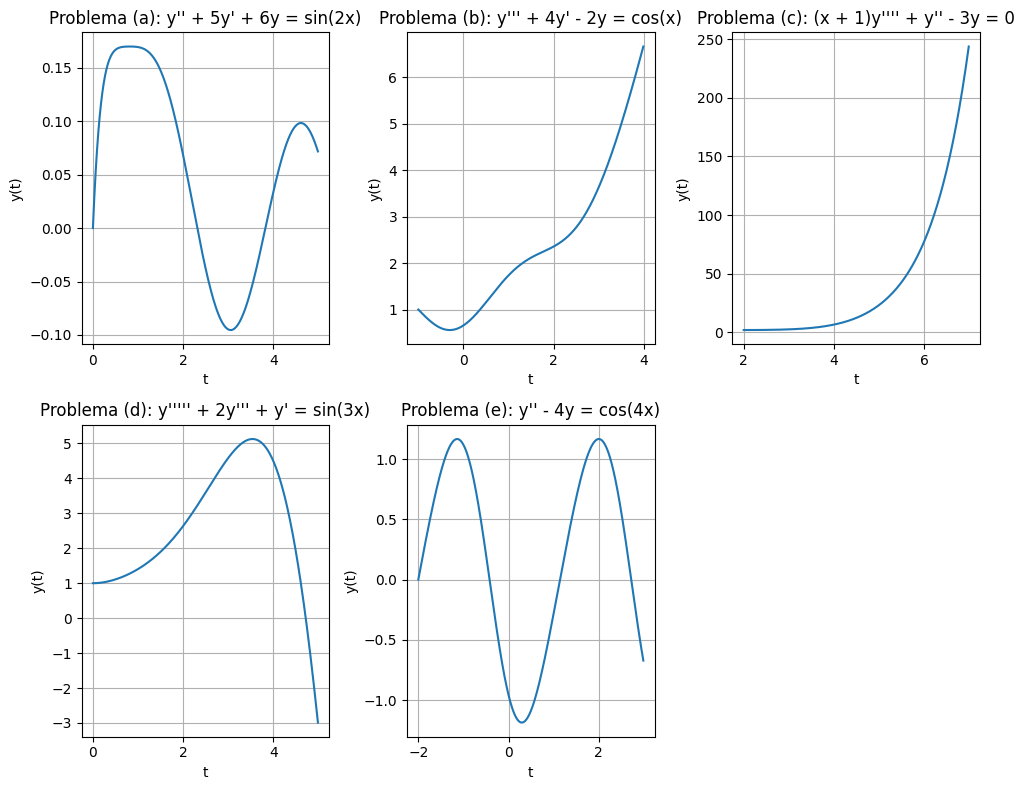

In [94]:
import numpy as np
import matplotlib.pyplot as plt

# Função Runge-Kutta de 4 ordem
def rk4(y, t, dt, f, *args):
    k1 = f(y, t, *args)
    k2 = f(y + 0.5 * dt * k1, t + 0.5 * dt, *args)
    k3 = f(y + 0.5 * dt * k2, t + 0.5 * dt, *args)
    k4 = f(y + dt * k3, t + dt, *args)
    return y + dt * (k1 + 2 * k2 + 2 * k3 + k4) / 6

# Problema (a): y'' + 5y' + 6y = sin(2x)
def f_a(y, t):
    y1, y2 = y
    dy1 = y2
    dy2 = -6 * y1 + np.sin(2 * t) - 5 * y2
    return np.array([dy1, dy2])

# Problema (b): y''' + 4y' - 2y = cos(x)
def f_b(y, t):
    y1, y2, y3 = y
    dy1 = y2
    dy2 = y3
    dy3 = 2 * y1 - np.cos(t) - 4 * y2
    return np.array([dy1, dy2, dy3])

# Problema (c): (x + 1)y'''' + y'' - 3y = 0
def f_c(y, t):
    y1, y2, y3, y4 = y
    dy1 = y2
    dy2 = y3
    dy3 = y4
    dy4 = 3 * y1 - y2
    return np.array([dy1, dy2, dy3, dy4])

# Problema (d): y''''' + 2y''' + y' = sin(3x)
def f_d(y, t):
    y1, y2, y3, y4, y5 = y
    dy1 = y2
    dy2 = y3
    dy3 = y4
    dy4 = y5
    dy5 = np.sin(3 * t) - 2 * y3 - y2
    return np.array([dy1, dy2, dy3, dy4, dy5])

# Problema (e): y'' - 4y = cos(4x)
def f_e(y, t):
    y1, y2 = y
    dy1 = y2
    dy2 = np.cos(4 * t) - 4 * y1
    return np.array([dy1, dy2])

# Parâmetros do problema
dt = 0.01  # Passo de tempo
t0 = 0  # Tempo inicial
tf = 5  # Tempo final

# Condições iniciais
# Problema (a): y(0) = 0, y'(0) = 1
y0_a = np.array([0, 1])
t_a = np.arange(t0, tf, dt)
y_a = np.zeros((len(t_a), 2))
y_a[0] = y0_a

# Problema (b): y(-1) = 1, y'(-1) = -1, y''(-1) = 0
y0_b = np.array([1, -1, 0])
t_b = np.arange(t0 -1, tf -1, dt)
y_b = np.zeros((len(t_b), 3))
y_b[0] = y0_b

# Problema (c): y(2) = 2, y'(2) = 0, y''(2) = 1, y'''(2) = -1
y0_c = np.array([2, 0, 1, -1])
t_c = np.arange(t0 +2, tf +2, dt)
y_c = np.zeros((len(t_c), 4))
y_c[0] = y0_c

# Problema (d): y(0) = 1,  y'(0) = 0, y''(0) = 1, y'''(0) = -1, y''''(0) = 2
y0_d = np.array([1, 0, 1, -1, 2])
t_d = np.arange(t0, tf, dt)
y_d = np.zeros((len(t_d), 5))
y_d[0] = y0_d

# Problema (e): y(-2) = 0, y'(-2) = 2
y0_e = np.array([0, 2])
t_e = np.arange(t0 -2, tf -2, dt)
y_e = np.zeros((len(t_e), 2))
y_e[0] = y0_e

# Resolver usando Runge-Kutta para cada problema
for i in range(1, len(t_a)):
    y_a[i] = rk4(y_a[i-1], t_a[i-1], dt, f_a)

for i in range(1, len(t_b)):
    y_b[i] = rk4(y_b[i-1], t_b[i-1], dt, f_b)

for i in range(1, len(t_c)):
    y_c[i] = rk4(y_c[i-1], t_c[i-1], dt, f_c)

for i in range(1, len(t_d)):
    y_d[i] = rk4(y_d[i-1], t_d[i-1], dt, f_d)

for i in range(1, len(t_e)):
    y_e[i] = rk4(y_e[i-1], t_e[i-1], dt, f_e)

# Plotando os resultados
plt.figure(figsize=(10, 8))

plt.subplot(2, 3, 1)
plt.plot(t_a, y_a[:, 0], label="y(t) para o problema (a)")
plt.title("Problema (a): y'' + 5y' + 6y = sin(2x)")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid(True)

plt.subplot(2, 3, 2)
plt.plot(t_b, y_b[:, 0], label="y(t) para o problema (b)")
plt.title("Problema (b): y''' + 4y' - 2y = cos(x)")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid(True)

plt.subplot(2, 3, 3)
plt.plot(t_c, y_c[:, 0], label="y(t) para o problema (c)")
plt.title("Problema (c): (x + 1)y'''' + y'' - 3y = 0")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid(True)

plt.subplot(2, 3, 4)
plt.plot(t_d, y_d[:, 0], label="y(t) para o problema (d)")
plt.title("Problema (d): y''''' + 2y''' + y' = sin(3x)")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid(True)

plt.subplot(2, 3, 5)
plt.plot(t_e, y_e[:, 0], label="y(t) para o problema (e)")
plt.title("Problema (e): y'' - 4y = cos(4x)")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid(True)

plt.tight_layout()
plt.show()
